In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [74]:
data_file = "~/IdeaProjects/BigDataML/src/main/resources/facebook_comments.csv"
df = pd.read_csv(data_file)
df.head()

,likes,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,diff2448,baseTime,...,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463.0,1.0,0.0,0,0.0,0,0,65,...,0,0,0,0.0,0,0,0,0,1,0
1,634995,0,463.0,1.0,0.0,0,0.0,0,0,10,...,0,0,0,0.0,0,0,0,1,0,0
2,634995,0,463.0,1.0,0.0,0,0.0,0,0,14,...,1,0,0,0.0,0,0,0,0,1,0
3,634995,0,463.0,1.0,7.0,0,3.0,7,-3,62,...,1,0,0,1.0,0,0,0,0,0,0
4,634995,0,463.0,1.0,1.0,0,0.0,1,0,58,...,0,0,0,0.0,0,1,0,0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   likes     40949 non-null  int64  
 1   Checkins  40949 non-null  int64  
 2   Returns   40898 non-null  float64
 3   Category  40892 non-null  float64
 4   commBase  40889 non-null  float64
 5   comm24    40949 non-null  int64  
 6   comm48    40901 non-null  float64
 7   comm24_1  40949 non-null  int64  
 8   diff2448  40949 non-null  int64  
 9   baseTime  40949 non-null  int64  
 10  length    40949 non-null  int64  
 11  shares    38500 non-null  float64
 12  hrs       40949 non-null  int64  
 13  sun_pub   40949 non-null  int64  
 14  mon_pub   39022 non-null  float64
 15  tue_pub   40949 non-null  int64  
 16  wed_pub   40949 non-null  int64  
 17  thu_pub   37904 non-null  float64
 18  fri_pub   40949 non-null  int64  
 19  sat_pub   40949 non-null  int64  
 20  sun_base  40949 non-null  in

In [76]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32544 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   likes     32544 non-null  int64  
 1   Checkins  32544 non-null  int64  
 2   Returns   32544 non-null  float64
 3   Category  32544 non-null  float64
 4   commBase  32544 non-null  float64
 5   comm24    32544 non-null  int64  
 6   comm48    32544 non-null  float64
 7   comm24_1  32544 non-null  int64  
 8   diff2448  32544 non-null  int64  
 9   baseTime  32544 non-null  int64  
 10  length    32544 non-null  int64  
 11  shares    32544 non-null  float64
 12  hrs       32544 non-null  int64  
 13  sun_pub   32544 non-null  int64  
 14  mon_pub   32544 non-null  float64
 15  tue_pub   32544 non-null  int64  
 16  wed_pub   32544 non-null  int64  
 17  thu_pub   32544 non-null  float64
 18  fri_pub   32544 non-null  int64  
 19  sat_pub   32544 non-null  int64  
 20  sun_base  32544 non-null  in

<AxesSubplot:>

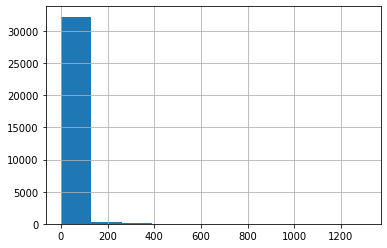

In [77]:
df['output'].hist()

<AxesSubplot:>

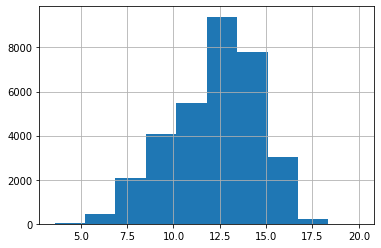

In [78]:
np.log(df['likes']).hist()

In [79]:
def add_log_column(df, col_name):
    df[col_name + '_log'] = np.log(df[col_name] + 1 ** -10)

<AxesSubplot:>

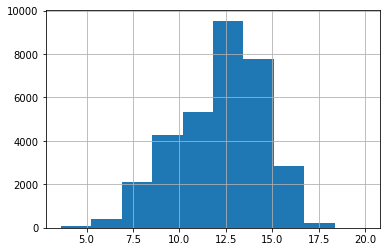

In [80]:
add_log_column(df, 'likes')
df['likes_log'].hist()

<AxesSubplot:>

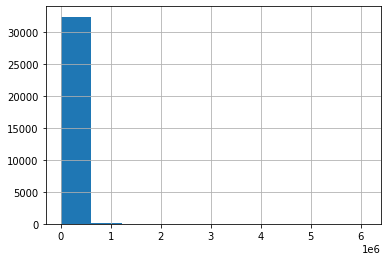

In [81]:
df['Returns'].hist()

<AxesSubplot:>

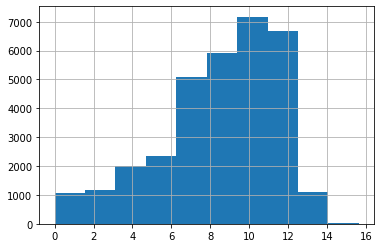

In [82]:
add_log_column(df, 'Returns')
df['Returns_log'].hist()

<AxesSubplot:>

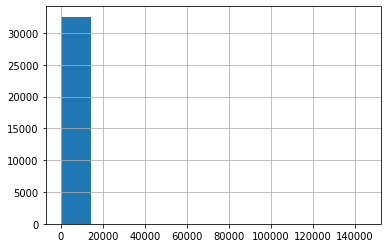

In [83]:
df['shares'].hist()

<AxesSubplot:>

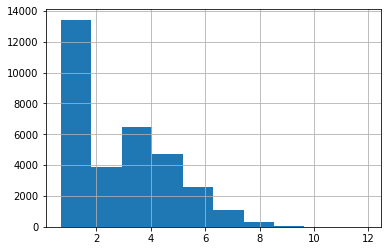

In [84]:
add_log_column(df, 'shares')
df['shares_log'].hist()

<AxesSubplot:>

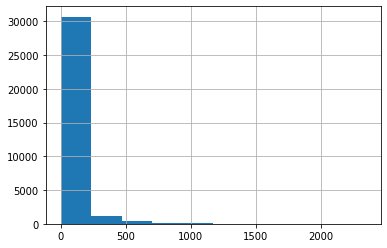

In [85]:
df['commBase'].hist()

<AxesSubplot:>

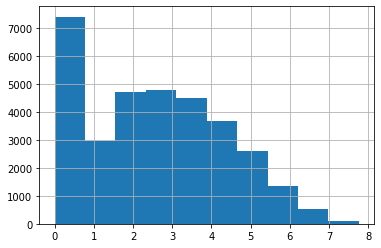

In [86]:
add_log_column(df, 'commBase')
df['commBase_log'].hist()

<AxesSubplot:>

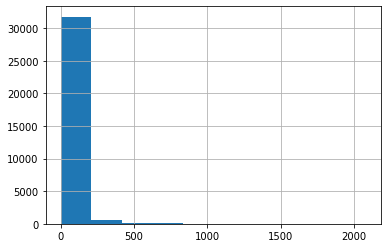

In [87]:
df['comm24'].hist()

<AxesSubplot:>

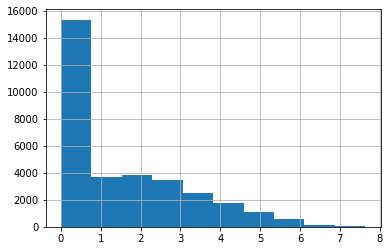

In [88]:
add_log_column(df, 'comm24')
df['comm24_log'].hist()

<AxesSubplot:>

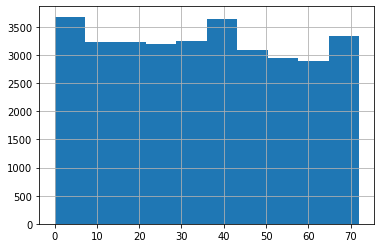

In [114]:
(df['baseTime']).hist()

<AxesSubplot:>

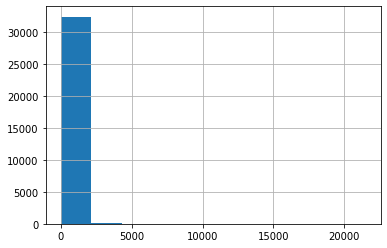

In [115]:
df['length'].hist()

<AxesSubplot:>

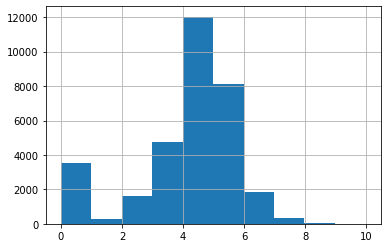

In [116]:
add_log_column(df, 'length')
df['length'+ '_log'].hist()

<AxesSubplot:>

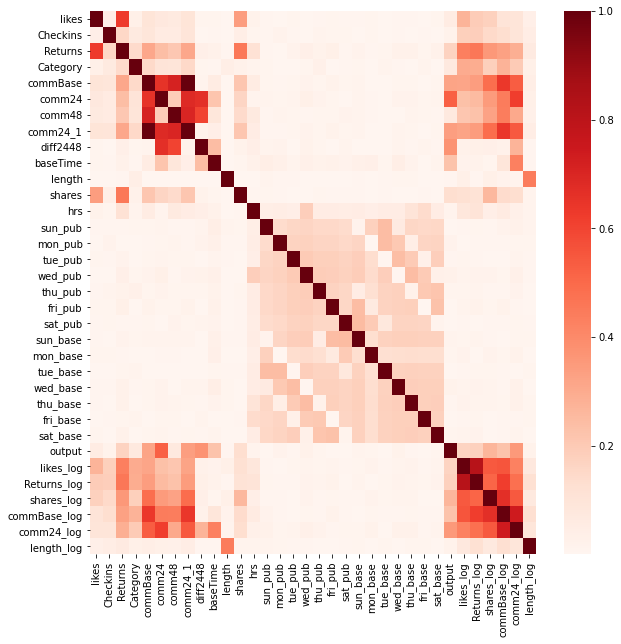

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), cmap='Reds')

In [90]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32544 entries, 0 to 40948
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   likes         32544 non-null  int64  
 1   Checkins      32544 non-null  int64  
 2   Returns       32544 non-null  float64
 3   Category      32544 non-null  float64
 4   commBase      32544 non-null  float64
 5   comm24        32544 non-null  int64  
 6   comm48        32544 non-null  float64
 7   comm24_1      32544 non-null  int64  
 8   diff2448      32544 non-null  int64  
 9   baseTime      32544 non-null  int64  
 10  length        32544 non-null  int64  
 11  shares        32544 non-null  float64
 12  hrs           32544 non-null  int64  
 13  sun_pub       32544 non-null  int64  
 14  mon_pub       32544 non-null  float64
 15  tue_pub       32544 non-null  int64  
 16  wed_pub       32544 non-null  int64  
 17  thu_pub       32544 non-null  float64
 18  fri_pub       32544 non-nu

In [91]:
def show_metrics(model, X_train, X_test, y_train, y_test):
    print("R2 на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
    print("R2 на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
    print("MAE: {:.2f}".format(mean_absolute_error(y_test, model.predict(X_test))))
    print("MSE: {:.2f}".format(mean_squared_error(y_test, model.predict(X_test))))

In [118]:
y = df['output']
to_drop = ['output']

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=to_drop), y, test_size=0.33,
                                                        random_state=42)

In [119]:
scaler = StandardScaler()
ridge = RidgeCV(alphas=[0.1,1,10,25,50,100])
pipe1 = Pipeline([('scaler', scaler), ('ridge', ridge)])
pipe1.fit(X_train, y_train)
show_metrics(pipe1, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.33
R2 на тестовом наборе: 0.25
MAE: 8.62
MSE: 894.06


<AxesSubplot:>

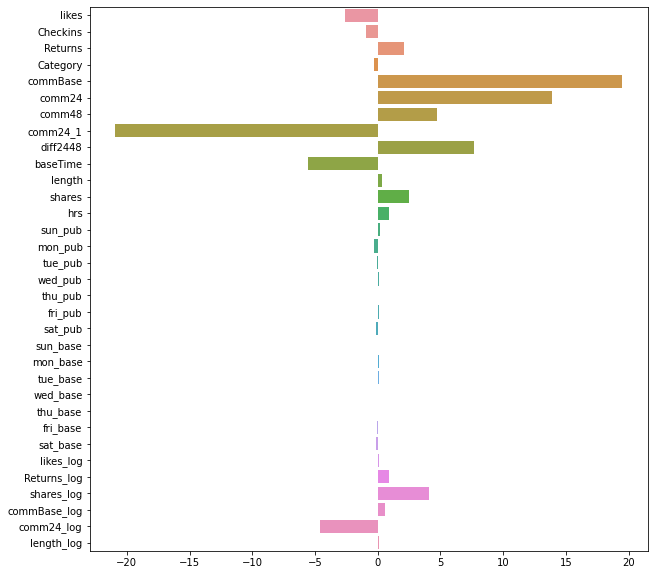

In [120]:
plt.figure(figsize=(10, 10))
sns.barplot(x=ridge.coef_, y = X_train.columns)

In [121]:
scaler = StandardScaler()
lasso = LassoCV(alphas=[0.1,1,10,25,50,100],eps=0.5, cv=5)
pipe2 = Pipeline([('scaler', scaler), ('lasso', lasso)])
pipe2.fit(X_train, y_train)
show_metrics(pipe2, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.33
R2 на тестовом наборе: 0.25
MAE: 8.42
MSE: 894.74


<AxesSubplot:>

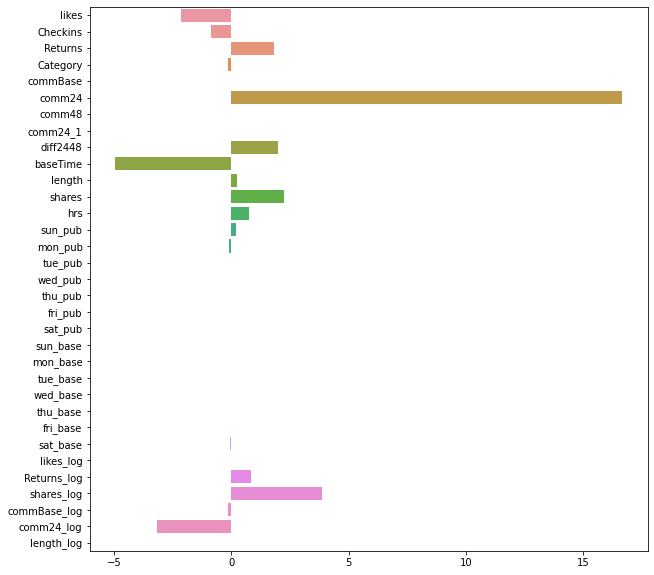

In [122]:
plt.figure(figsize=(10, 10))
sns.barplot(x=lasso.coef_, y = X_train.columns)

In [123]:
lasso.get_params()

{'alphas': [0.1, 1, 10, 25, 50, 100],
 'copy_X': True,
 'cv': 5,
 'eps': 0.5,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [124]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=10)
rf.fit(X_train, y_train)
show_metrics(rf, X_train, X_test, y_train, y_test)

R2 на обучающем наборе: 0.93
R2 на тестовом наборе: 0.59
MAE: 4.35
MSE: 488.51


<AxesSubplot:>

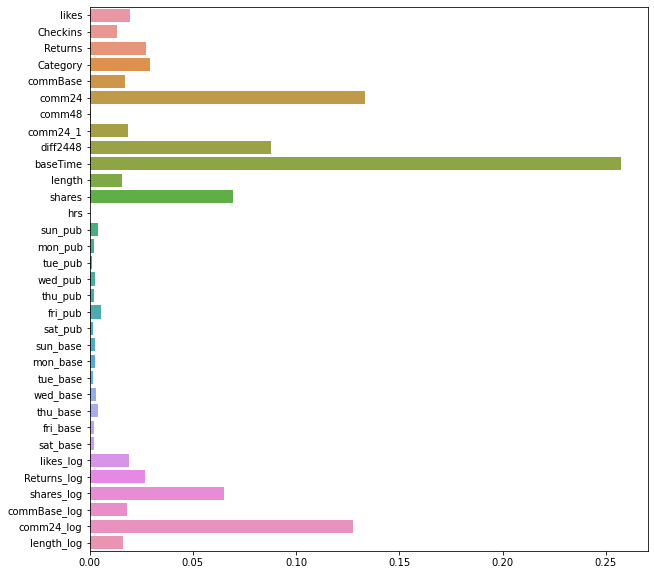

In [125]:
plt.figure(figsize=(10, 10))
sns.barplot(x=rf.feature_importances_, y = X_train.columns)